Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

### EXERCÍCIO 01

In [43]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

digits = load_digits()

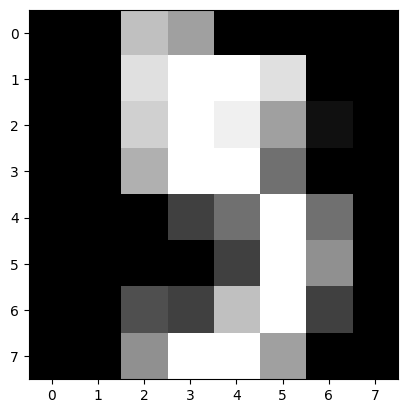

In [44]:
plt.gray()
plt.imshow(digits.images[5])
plt.show()

#mnist do keras (maior resolucao) https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras

In [45]:
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

In [46]:
print(f'Tamanho de training dataset: {X_train.shape}, {y_train.shape}')
print(f'Tamanho de testing dataset: {X_test.shape}, {y_test.shape}')

Tamanho de training dataset: (1437, 64), (1437,)
Tamanho de testing dataset: (360, 64), (360,)


In [47]:
def grid_search(param_grid,classifier):
    grid_cv = GridSearchCV(classifier(random_state=101),param_grid,verbose=3)
    grid_cv.fit(X_train,y_train)
    return grid_cv.best_params_, grid_cv.best_score_



In [47]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[None,2,4,8,12,16,20,24,28,32,36,40,90,120,150],"min_samples_leaf":[1,2,3,4,5], "min_samples_split":[2,3,4,5]}
grid_search(param_grid,DecisionTreeClassifier)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.865 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.864 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.861 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.844 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.815 total time=

({'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 np.float64(0.8517953929539296))

In [48]:
# Executando com os params escolhidos
clf = DecisionTreeClassifier(random_state=42, max_depth=None,criterion='entropy',min_samples_leaf=2,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Precisao: {clf.score(X_test, y_test)}')

Precisao: 0.8833333333333333


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.71      0.89      0.79        28
           2       0.82      0.85      0.84        33
           3       0.88      0.85      0.87        34
           4       0.91      0.91      0.91        46
           5       0.98      0.94      0.96        47
           6       0.97      0.91      0.94        35
           7       0.91      0.85      0.88        34
           8       0.76      0.83      0.79        30
           9       0.89      0.82      0.86        40

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



In [50]:
print(confusion_matrix(y_test, y_pred))

[[31  0  0  0  1  0  0  1  0  0]
 [ 0 25  1  0  0  0  0  0  0  2]
 [ 0  1 28  1  0  0  0  1  2  0]
 [ 0  1  2 29  0  0  0  0  1  1]
 [ 0  2  0  0 42  0  0  0  2  0]
 [ 0  1  0  0  0 44  1  0  1  0]
 [ 1  0  0  0  1  0 32  0  1  0]
 [ 0  2  2  0  0  0  0 29  0  1]
 [ 0  0  1  3  0  1  0  0 25  0]
 [ 0  3  0  0  2  0  0  1  1 33]]


### EXERCÍCIO 02

In [55]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# isolando features de novo
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# testando com gridsearch 
params = {'max_depth':[1,5,10,20,30,40,50],'learning_rate': [1, 0.1, 0.01, 0.001],'subsample': [0.25, 0.5, 0.7, 1], 'n_estimators':[50,60,70,80,90,100]}

grid_search(params,xgb.XGBRegressor)


Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV 1/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.25;, score=0.414 total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.25;, score=0.412 total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.25;, score=0.399 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.25;, score=0.485 total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.25;, score=0.359 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.5;, score=0.586 total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.5;, score=0.543 total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.5;, score=0.572 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=1, n_estimators=50, subsample=0.5;,

({'learning_rate': 0.1,
  'max_depth': 20,
  'n_estimators': 100,
  'subsample': 0.5},
 np.float64(0.8727361798286438))

In [56]:
# executando com params escolhidos 
xgbc = xgb.XGBRegressor(random_state=42,max_depth=20,learning_rate=0.1,subsample=0.5,n_estimators=100)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print(f'Precisao: {xgbc.score(X_test, y_test)}')

Precisao: 0.8697279095649719


In [59]:
# testando com outro ensemble

params_rf = {'max_depth': [10, 20, 30, 40, 100, None],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'n_estimators': [200, 400, 800, 1000, 2000]}

grid_search(params_rf,RandomForestRegressor)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10

/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/hom

({'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'n_estimators': 1000},
 np.float64(0.8383929820924472))

In [60]:
# executando com params escolhidos 
rft = RandomForestRegressor(random_state=42,max_depth=30,max_features='sqrt',min_samples_leaf=1,n_estimators=1000)
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
print(f'Precisao: {rft.score(X_test, y_test)}')

Precisao: 0.859898785209632


In [62]:
import pickle

filename = 'xgboost.pkl'
pickle.dump(xgbc, open(filename, 'wb'))